In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import torch
from torch import nn
import lightning as L
import matplotlib.pyplot as plt
from transphorm.model_components import SyntheticTSDataModule
from pathlib import Path
import seaborn as sns

from transphorm.model_components.model_modules import Encoder, Decoder, VanillaAutoEncoder
import polars as pl

from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import StandardScaler

<Axes: xlabel='epoch', ylabel='loss'>

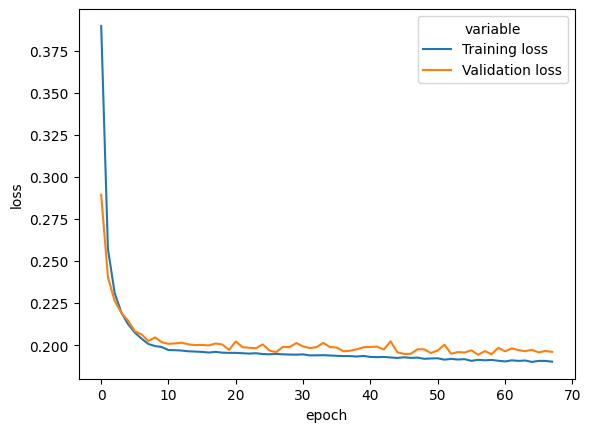

In [3]:
model_path = '/Users/mds8301/Development/transphorm/lightning_logs/version_12/checkpoints/epoch=67-step=74392.ckpt'
path = '/Users/mds8301/Development/transphorm/lightning_logs/version_12/metrics.csv'
def read_metrics_csv(path ):
    return (pl.read_csv(path)
            .drop('step')
            .group_by('epoch')
            .mean()
            .sort('epoch')
            .melt(id_vars = ['epoch'], value_name='loss')
    )
metrics = read_metrics_csv(path)
sns.lineplot(data = metrics, x = 'epoch',y =  'loss', hue = 'variable')


In [222]:
model.eval()
model.to('cpu')

VanillaAutoEncoder(
  (encoder): Encoder(
    (linear_layers): Sequential(
      (0): Linear(in_features=5000, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=256, bias=True)
      (3): ReLU()
      (4): Linear(in_features=256, out_features=256, bias=True)
    )
  )
  (decoder): Decoder(
    (linear_layers): Sequential(
      (0): Linear(in_features=256, out_features=512, bias=True)
      (1): ReLU()
      (2): Linear(in_features=512, out_features=5000, bias=True)
    )
  )
  (loss_fn): MSELoss()
)

In [223]:
encoder = model.encoder
encoder.eval()


Encoder(
  (linear_layers): Sequential(
    (0): Linear(in_features=5000, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=256, bias=True)
  )
)

In [224]:
embeddings = encoder.linear_layers[2].weight.cpu().detach().numpy()

In [225]:
from sklearn.manifold import TSNE

In [226]:
tsne = TSNE(n_components=2, random_state=0)
tsne_emb = tsne.fit_transform(embeddings)

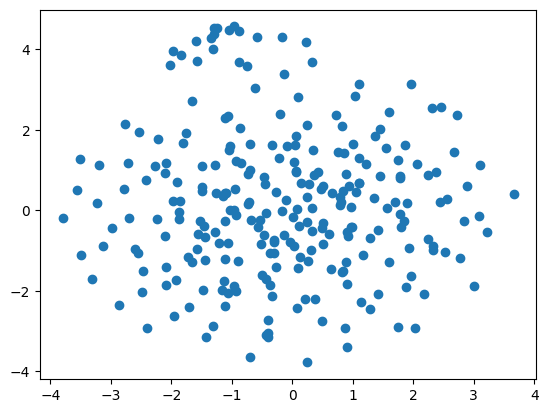

In [227]:
plt.scatter(tsne_emb[:,0], tsne_emb[:,1])

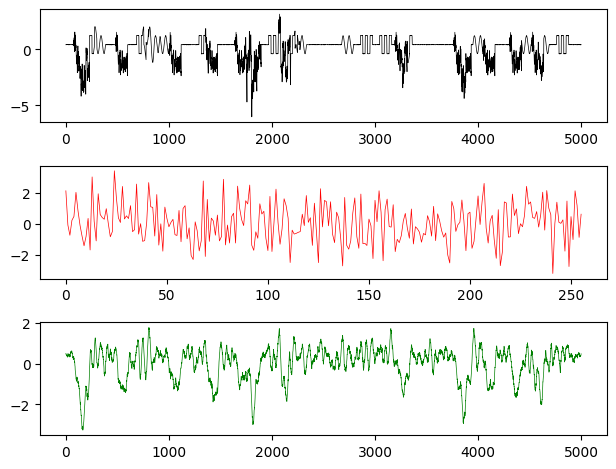

In [228]:
from transphorm.model_components import generate_sequence
seq = generate_sequence()
seq_ten = torch.Tensor(seq)
encoder_output = encoder(seq_ten)
pred = model(seq_ten)
layout = '''
AAA
BBB
CCC
'''
fig, ax = plt.subplot_mosaic(layout)
ax['A'].plot(seq, lw = 0.5, color = 'black')
ax['B'].plot(encoder_output.detach().numpy(), lw = 0.5, color = 'red')
ax['C'].plot(pred.detach().numpy(), lw = 0.5, color = 'green')
plt.tight_layout()

In [229]:
from transphorm.model_components import generate_dataset
data = generate_dataset(numb_samples=1000)

In [4]:
scaler = StandardScaler()
scaled = scaler.fit_transform(data)


NameError: name 'data' is not defined

In [5]:
import numpy as np

In [6]:
ssa = SingularSpectrumAnalysis(window_size=100, groups =[np.arange(0,10), np.arange(10,25), np.arange(25, 100)])
x_transform = ssa.fit_transform(data)

NameError: name 'data' is not defined

(10, 60139)

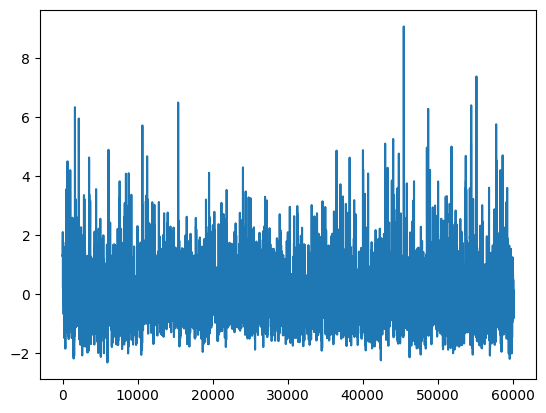

In [8]:
fp = torch.load("/Users/mds8301/Desktop/temp/dopamine_full_timeseries_array.pt")
fp = fp.detach().numpy()

fp_scaler = StandardScaler()
fp_data = fp[0:10,1:][:,::25]
# fp_data = fp_scaler.fit_transform(fp_data)
plt.plot(fp_data[0])
fp_data.shape

In [9]:
window_size = int(107)*5 # 1 sec
# ws_3 = int(window_size/3)

ssa = SingularSpectrumAnalysis(window_size=window_size, groups  = 4)
fp_transform = ssa.fit_transform(fp_data)


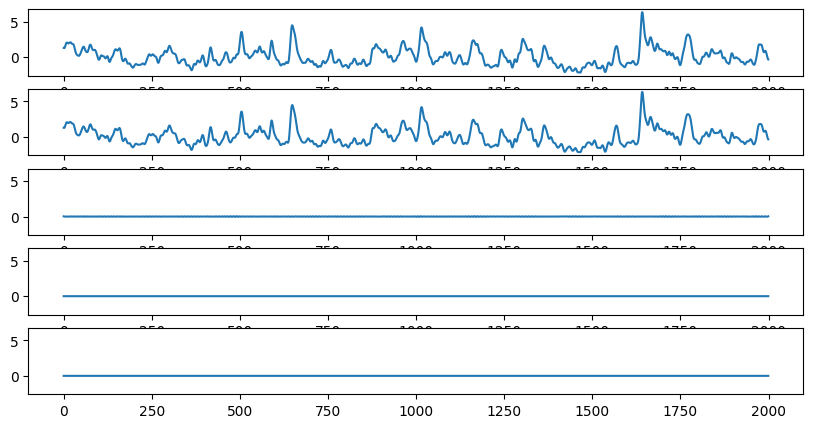

In [29]:
sample_idx = 0
sample_transform = fp_transform[sample_idx]
fig, ax = plt.subplots(nrows= 5, figsize = (10,5), sharey=True)
ax[0].plot(fp_data[sample_idx][:2_000])
for i in range(4):
    ax[i+1].plot(sample_transform[i][:2_000])

<Axes: xlabel='x', ylabel='y'>

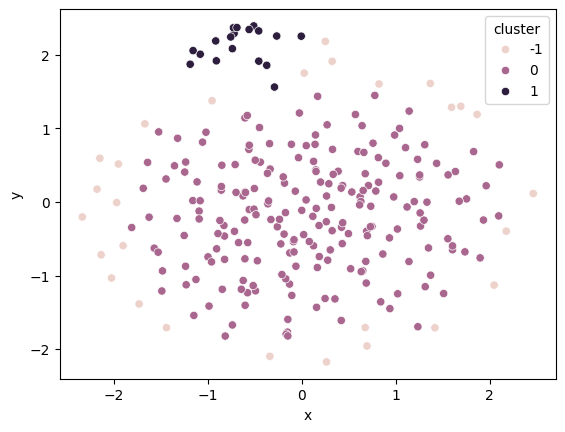

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Create a DataFrame from the embeddings


# Scale the data
scaler = StandardScaler()
scaled_embeddings = scaler.fit_transform(tsne_emb)

# Choose the number of clusters
n_clusters = 20
min_samples = int(256/8)

# Create a K-Means instance
dbscan = DBSCAN(eps = 0.5, min_samples=10)

# Fit the K-Means model
dbscan.fit(scaled_embeddings)

# Get the cluster labels
cluster_labels = dbscan.labels_

# Visualize the clusters
# plt.show()
cluster_labels
embeddings_df = pd.DataFrame({
    'x': scaled_embeddings[:,0],
    'y': scaled_embeddings[:,1],
    'cluster': cluster_labels
})
sns.scatterplot(data = embeddings_df, x='x',y= 'y', hue = 'cluster')

In [ ]:
embeddings_df = pd.DataFrame({
    'x': scaled_embeddings[:,0],
    'y': scaled_embeddings[:,1],
    'cluster': cluster_labels
})

ImportError: cannot import name 'PCATransformer' from 'sktime.transformations.panel' (/Users/mds8301/anaconda3/envs/transphorm/lib/python3.11/site-packages/sktime/transformations/panel/__init__.py)